# Multicolinealidad



*   Andrés Alejandro Guzmán González | A01633819
*   Joel Isaías Solano Ocampo | A01639289
*   Tania Sayuri Guizado Hernandez | A01640092
*   Ernesto Reynoso Lizárraga | A01639915



In [ ]:
!pip install ucimlrepo
!pip install --upgrade scikit-learn

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

print(abalone.metadata)
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Life Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscop

In [ ]:
target_url = 'https://archive.ics.uci.edu/static/public/1/data.csv'
abalone = pd.read_csv(target_url)
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone = abalone.drop('Sex', axis=1)
abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
X = abalone.loc[:,:'Shell_weight']
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
Y = abalone['Rings']
Y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [ ]:
X_fit = sm.add_constant(X)
X_fit


,const,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
X.shape

(4177, 7)

In [ ]:
model = sm.OLS(Y, X_fit)
fit_model = model.fit()
print("R^2 del modelo original:", fit_model.rsquared)
print("Parámetros del modelo original:")
print(fit_model.params)

R^2 del modelo original: 0.5276299399919839
Parámetros del modelo original:
const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64


In [ ]:
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:24:05   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.

# Busca una puntos ”leverage”

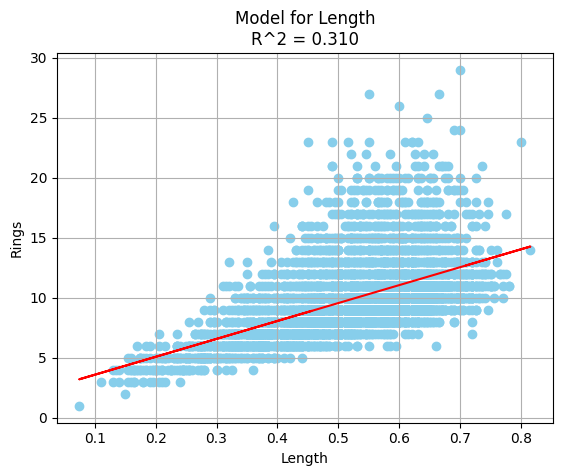

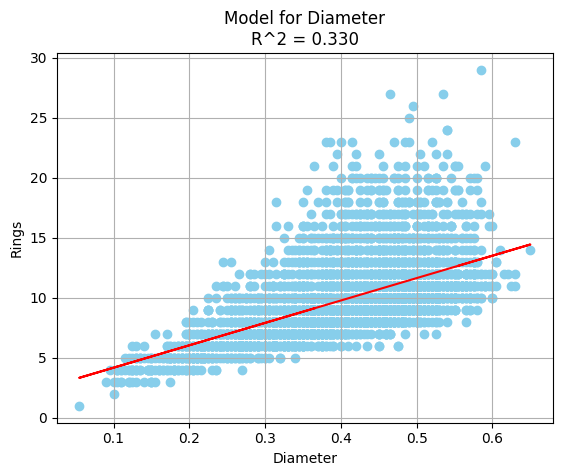

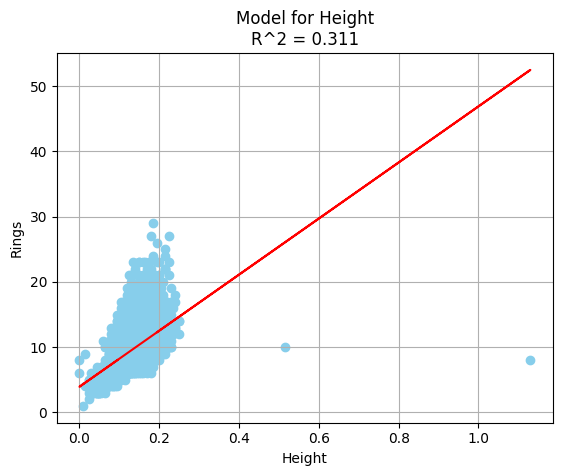

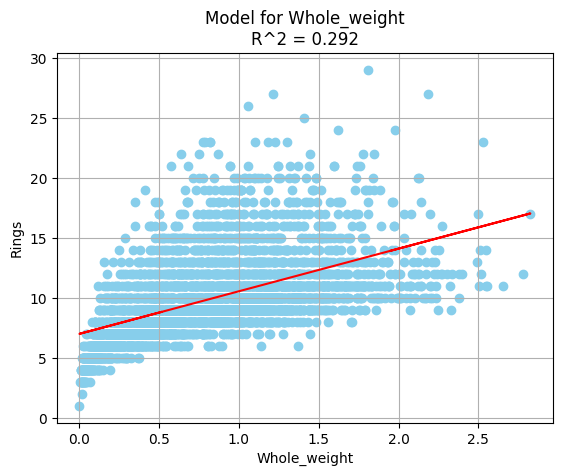

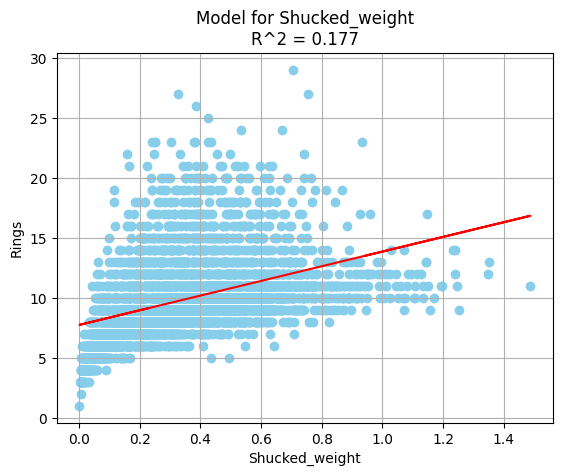

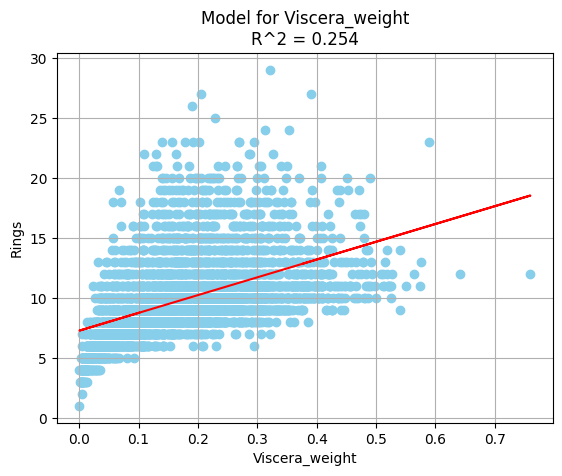

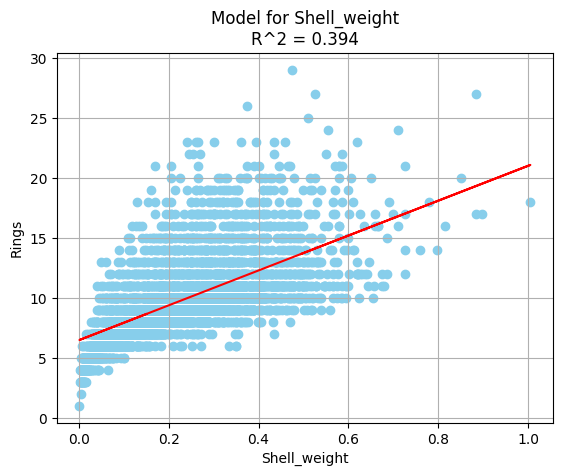

In [ ]:
# A continuación, ajustar el modelo de mínimos cuadrados ordinarios (OLS) para cada variable independiente
for column in X.columns:
    X_temp = X[column]
    X_temp_fit = sm.add_constant(X_temp)
    model_temp = sm.OLS(Y, X_temp_fit)
    fit_model_temp = model_temp.fit()
    r_squared_temp = fit_model_temp.rsquared
    parameters_temp = fit_model_temp.params

    # Visualizar el ajuste del modelo
    plt.scatter(X_temp, Y, color='skyblue')
    plt.plot(X_temp, parameters_temp[1] * X_temp + parameters_temp[0], color='red')
    plt.title(f'Model for {column}\nR^2 = {r_squared_temp:.3f}')
    plt.xlabel(column)
    plt.ylabel('Rings')
    plt.grid()
    plt.show()

[0.001 0.001 0.001 ... 0.002 0.001 0.003]


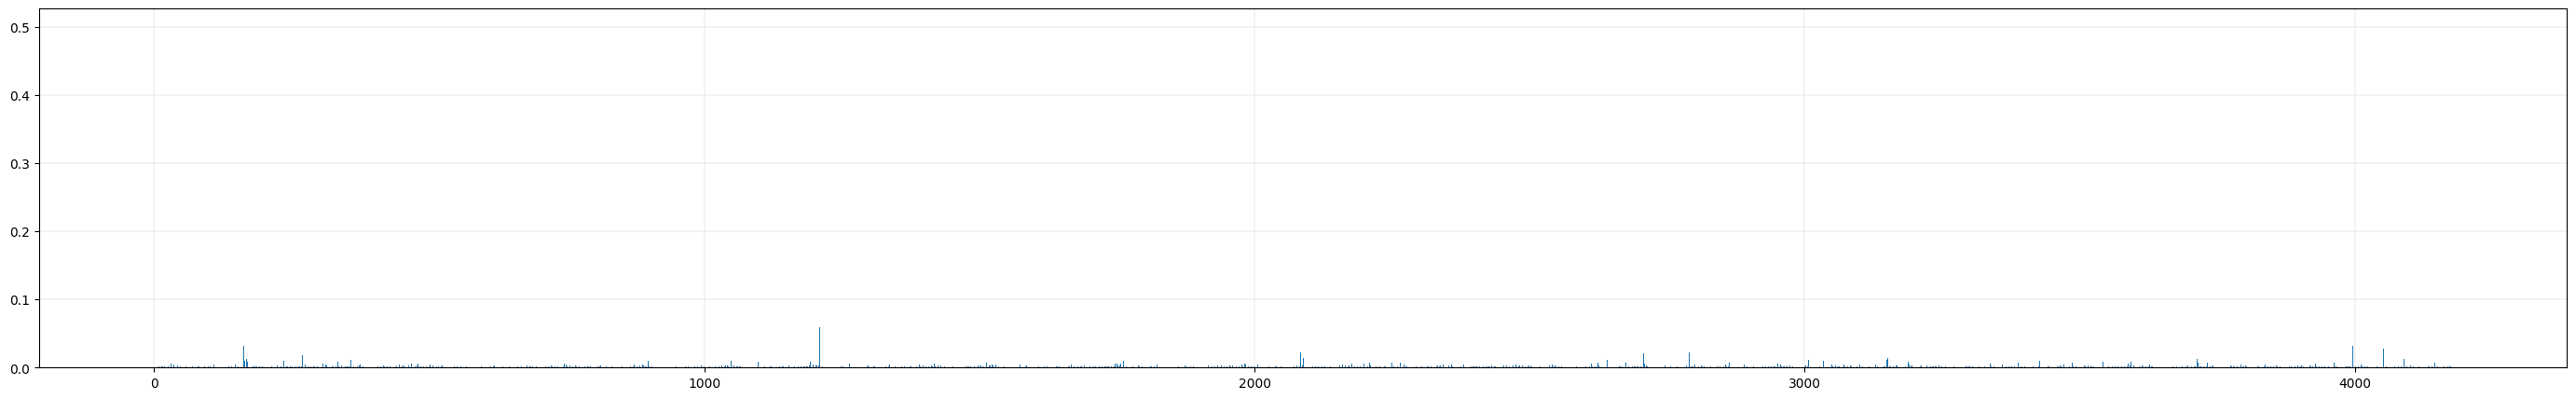

In [ ]:
influence = fit_model.get_influence()
H_diag = influence.hat_matrix_diag
print(H_diag)

plt.figure(figsize =(35, 5))
plt.bar(abalone.index, H_diag, width = 0.5)
#plt.xticks(abalone.index)
plt.grid(linewidth = 0.2)

In [ ]:
mapping = sorted(list(enumerate(H_diag)), key=lambda item: item[1],reverse=True)
max_value_idxs = [item[0] for item in mapping]

print('Top leverage values')
print([item[1] for item in mapping][:3])

print('\nSample indexes with more leverage')
print(abalone.iloc[max_value_idxs])

Top leverage values
[0.5019723528421322, 0.05960859244317343, 0.05295671927323318]

Sample indexes with more leverage
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
2051   0.455     0.355   1.130        0.5940          0.3320          0.1160   
1210   0.185     0.375   0.120        0.4645          0.1960          0.1045   
1417   0.705     0.565   0.515        2.2100          1.1075          0.4865   
3518   0.710     0.570   0.195        1.3480          0.8985          0.4435   
163    0.725     0.560   0.210        2.1410          0.6500          0.3980   
...      ...       ...     ...           ...             ...             ...   
837    0.475     0.365   0.125        0.5465          0.2290          0.1185   
600    0.535     0.420   0.145        0.9260          0.3980          0.1965   
3555   0.535     0.415   0.135        0.7800          0.3165          0.1690   
2744   0.480     0.375   0.120        0.5895          0.2535          0.1280   
48



---

## Distancia Cook para detección de puntos influyentes


In [ ]:
np.set_printoptions(suppress=True)
cooks_dist = influence.cooks_distance[0]
print(cooks_dist[:10])

[0.001 0.    0.    0.    0.    0.    0.002 0.    0.    0.001]


In [ ]:
summary_cooks = influence.summary_frame()
print(summary_cooks[:10])

   dfb_const  dfb_Length  dfb_Diameter  dfb_Height  dfb_Whole_weight  \
0   0.013647   -0.032927      0.045769   -0.048025          0.010240   
1  -0.001956    0.000391      0.000189    0.000044          0.000010   
2   0.009360    0.001597     -0.007949    0.001964         -0.006124   
3   0.002439   -0.008192      0.008150    0.001118         -0.000097   
4   0.000109   -0.000049      0.000021   -0.000022          0.000027   
5  -0.000208   -0.001309      0.001323    0.000343          0.000119   
6  -0.006927    0.015866     -0.013475    0.004010         -0.007380   
7  -0.015747    0.012440      0.002541   -0.028781          0.005996   
8   0.000420    0.000070     -0.000485   -0.000221          0.000825   
9  -0.010038   -0.009157      0.017295   -0.004262          0.034385   

   dfb_Shucked_weight  dfb_Viscera_weight  dfb_Shell_weight       cooks_d  \
0           -0.006130           -0.016609         -0.009500  8.789307e-04   
1           -0.000171           -0.000053         -0.

In [ ]:
summary_cooks = influence.summary_frame()
print(summary_cooks)

      dfb_const  dfb_Length  dfb_Diameter  dfb_Height  dfb_Whole_weight  \
0      0.013647   -0.032927      0.045769   -0.048025          0.010240   
1     -0.001956    0.000391      0.000189    0.000044          0.000010   
2      0.009360    0.001597     -0.007949    0.001964         -0.006124   
3      0.002439   -0.008192      0.008150    0.001118         -0.000097   
4      0.000109   -0.000049      0.000021   -0.000022          0.000027   
...         ...         ...           ...         ...               ...   
4172  -0.001359   -0.001517      0.002022    0.001833         -0.002014   
4173  -0.001104    0.002819     -0.002169   -0.001326         -0.000042   
4174   0.002614    0.006257     -0.002471   -0.024792          0.004487   
4175  -0.001575    0.001016     -0.000027   -0.001537         -0.003201   
4176   0.006267    0.000073     -0.003912   -0.000831          0.004942   

      dfb_Shucked_weight  dfb_Viscera_weight  dfb_Shell_weight       cooks_d  \
0              -0.0

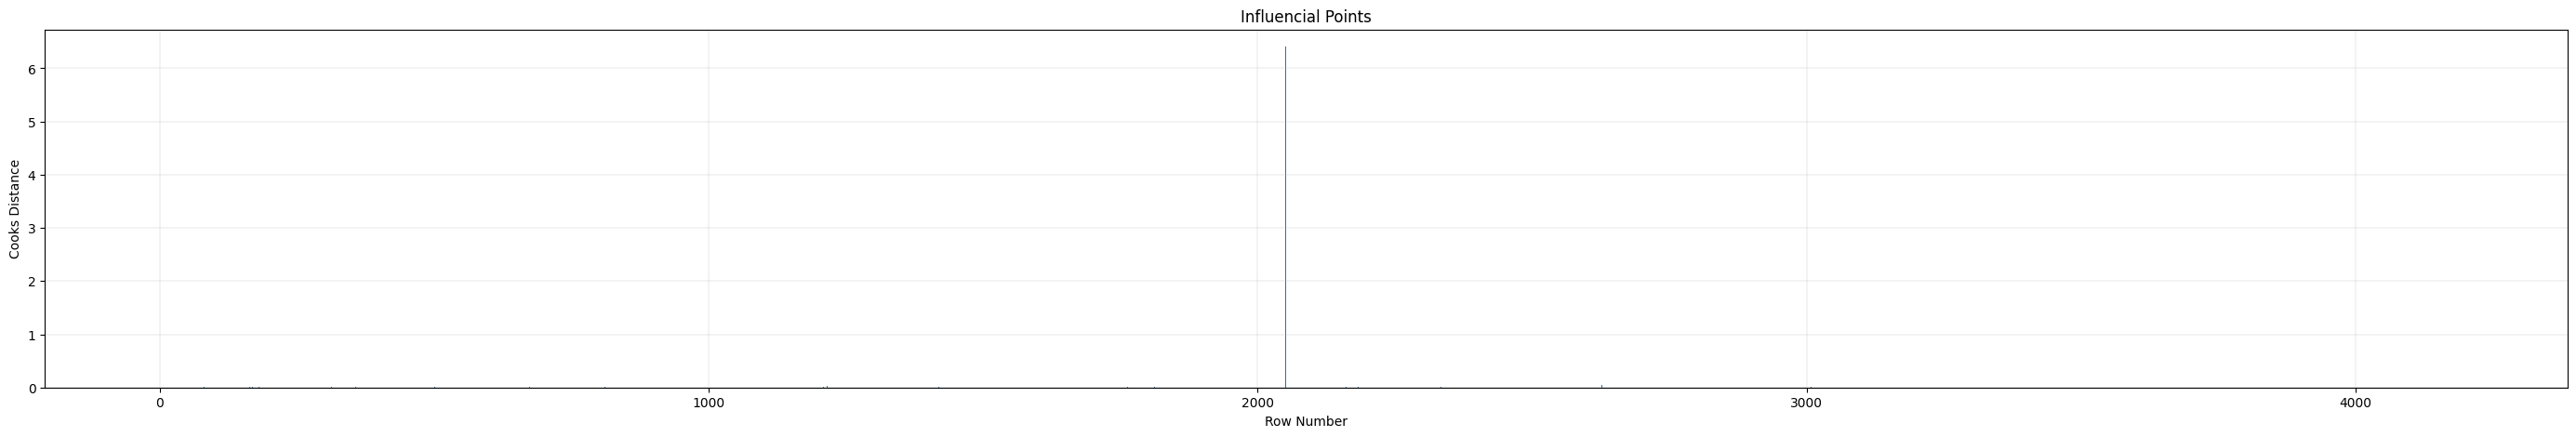

In [ ]:
plt.figure(figsize = (35,5))
plt.bar(abalone.index, cooks_dist, width = 0.5)
#plt.xticks(abalone.index);
plt.xlabel('Row Number')
plt.ylabel('Cooks Distance')
plt.title('Influencial Points')
plt.grid(linewidth = 0.2)

In [ ]:
mapping = sorted(list(enumerate(cooks_dist)), key=lambda item: item[1], reverse=True)
max_value_idxs = [item[0] for item in mapping]

print("Top cook's distance values:")
print([item[1] for item in mapping][:3])

print('Top Sample indexes with more distance values:')
print(abalone.iloc[max_value_idxs])

Top cook's distance values:
[6.409299513058319, 0.04919146658760428, 0.031621158221939866]
Top Sample indexes with more distance values:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
2051   0.455     0.355   1.130        0.5940          0.3320          0.1160   
2627   0.275     0.205   0.070        0.1055          0.4950          0.0190   
480    0.700     0.585   0.185        1.8075          0.7055          0.3215   
3518   0.710     0.570   0.195        1.3480          0.8985          0.4435   
1528   0.725     0.575   0.240        2.2100          1.3510          0.4130   
...      ...       ...     ...           ...             ...             ...   
2522   0.545     0.450   0.150        0.8795          0.3870          0.1500   
2369   0.560     0.440   0.170        0.9445          0.3545          0.2175   
1272   0.475     0.355   0.100        0.5035          0.2535          0.0910   
1022   0.640     0.500   0.170        1.5175          0.6930   

In [ ]:
mean_cooks = np.mean(cooks_dist)
mean_cooks

0.0018730877579285728

In [ ]:
mean_cooks_list = [4*mean_cooks for _ in abalone.index]
cooks_threshold = [4/len(cooks_dist) for _ in abalone.index]

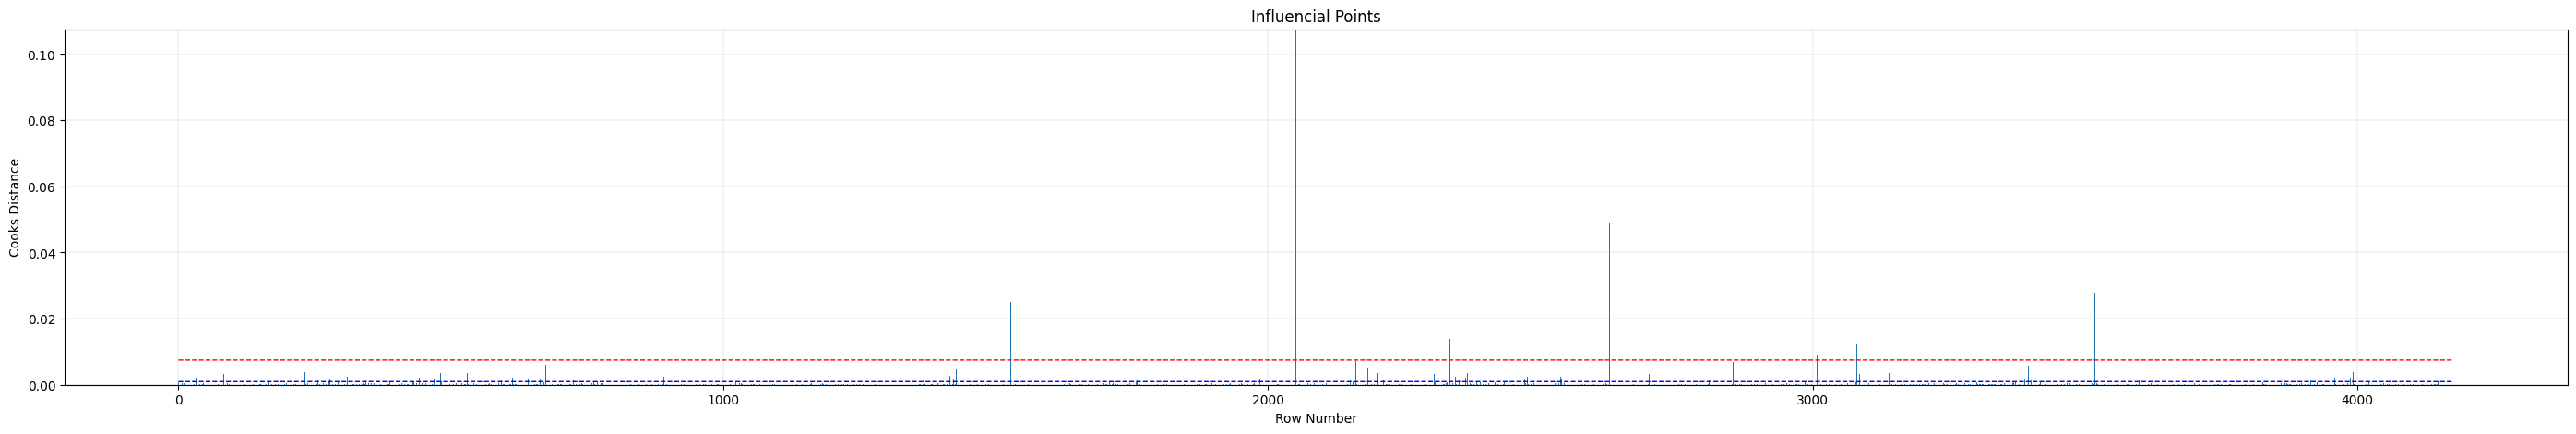

In [ ]:
plt.figure(figsize = (35,5))
plt.bar(abalone.index, cooks_dist, width=0.5)
plt.plot(abalone.index, mean_cooks_list, color="red", linestyle='--', linewidth=1)
plt.plot(abalone.index, cooks_threshold, color="blue", linestyle='--', linewidth=1)

#plt.xticks(abalone.index);
plt.xlabel('Row Number')
plt.ylabel('Cooks Distance')
plt.title('Influencial Points')
plt.ylim(top=max(mean_cooks_list + cooks_threshold) + 1e-1)
plt.grid(linewidth=0.2)

In [ ]:
influencial_points = abalone.index[cooks_dist > 4/len(cooks_dist)]
print(influencial_points[:10])
abalone.iloc[influencial_points,:].head(10)

Int64Index([6, 9, 32, 33, 36, 67, 72, 81, 83, 85], dtype='int64')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
32,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
33,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19
36,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.340,16
67,0.595,0.495,0.185,1.2850,0.4160,0.2240,0.485,13
72,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425,20
81,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675,12
83,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.580,21
85,0.570,0.465,0.180,1.2950,0.3390,0.2225,0.440,12


In [ ]:
noninfluencial_point = abalone.index[cooks_dist < 4/len(cooks_dist)]
print(noninfluencial_point[:10])
abalone.iloc[noninfluencial_point,:].head(10)

Int64Index([0, 1, 2, 3, 4, 5, 7, 8, 10, 11], dtype='int64')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
10,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14
11,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


In [ ]:
for i in X_fit:
  winsorize(X_fit[i],limits=[0.25,0.25])

# Calcula el nuevo valor de $𝑹^𝟐$ y los parámetros obtenidos, comparar.

In [ ]:
model_transformed = sm.OLS(Y, X_fit)
fit_model_transformed = model_transformed.fit()
print(fit_model_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:24:43   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.

In [ ]:
r_squared_transformed = fit_model_transformed.rsquared
parameters_transformed = fit_model_transformed.params

print("\nR^2 del modelo transformado:", r_squared_transformed)
print("Parámetros del modelo transformado:")
print(parameters_transformed)


R^2 del modelo transformado: 0.5276299399919839
Parámetros del modelo transformado:
const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64


# Busca multicolinealidad en los datos usando VIF

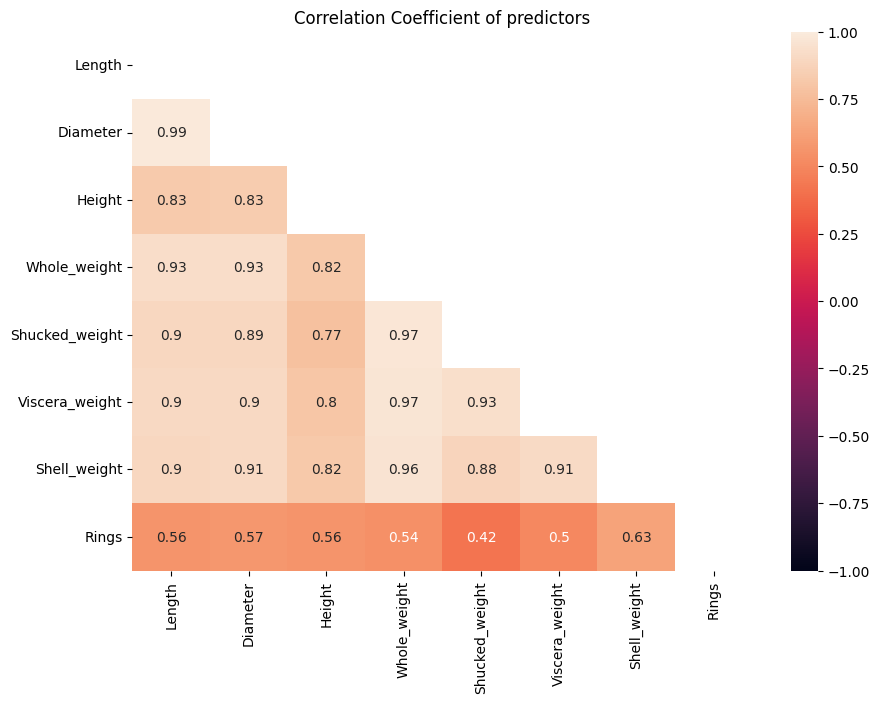

In [ ]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(abalone.corr(),dtype=bool))

sns.heatmap(abalone.corr(), annot=True, mask=mask,vmin=-1,vmax=1)
plt.title('Correlation Coefficient of predictors')
plt.show()

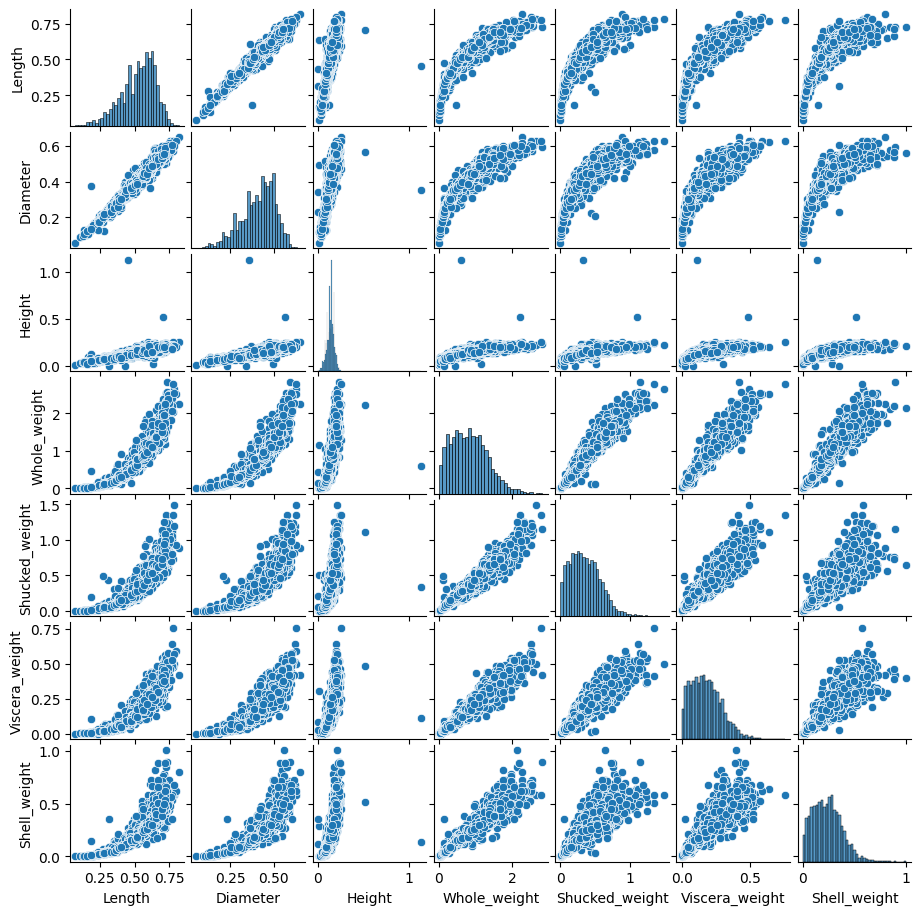

In [ ]:
Fig = sns.pairplot(X)
Fig.fig.set_size_inches(9,9)

In [ ]:
def compute_vif(considered_features):
  X = abalone[considered_features].copy()
  X['intercept'] = 1
  vif_data = pd.DataFrame()
  vif_data['feature'] = X.columns
  vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
  vif_data = vif_data[vif_data['feature'] != 'intercept']
  return vif_data

In [ ]:
considered_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']
print(compute_vif(considered_features).sort_values('VIF',ascending=False))

          feature         VIF
3    Whole_weight  109.592750
1        Diameter   41.845452
0          Length   40.771813
4  Shucked_weight   28.353191
6    Shell_weight   21.258289
5  Viscera_weight   17.346276
2          Height    3.559939


# Analiza y elimina variables independientes que indiquen que hay multicolinealidad

In [ ]:
considered_features.remove('Whole_weight')
print(compute_vif(considered_features).sort_values('VIF',ascending=False))

          feature        VIF
1        Diameter  41.819755
0          Length  40.763955
4  Viscera_weight  10.697780
3  Shucked_weight   8.852112
5    Shell_weight   7.817781
2          Height   3.558443


In [ ]:
X = abalone[considered_features]
model = sm.OLS(Y,sm.add_constant(X))
fit_model = model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     722.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:25:02   Log-Likelihood:                -9328.3
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4170   BIC:                         1.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8131      0.274     10.

In [ ]:
features_alt = [i for i in considered_features if i != 'Viscera_weight']
print(compute_vif(features_alt).sort_values('VIF',ascending=False))

          feature        VIF
1        Diameter  41.791313
0          Length  40.320617
4    Shell_weight   6.930345
3  Shucked_weight   6.115478
2          Height   3.536331


In [ ]:
X = abalone[features_alt]
model = sm.OLS(Y,sm.add_constant(X))
fit_model = model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     866.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:25:02   Log-Likelihood:                -9328.3
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4171   BIC:                         1.871e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7936      0.268     10.

In [ ]:
features_alt = [i for i in considered_features if i != 'Length']
print(compute_vif(features_alt).sort_values('VIF',ascending=False))

          feature        VIF
3  Viscera_weight  10.581434
2  Shucked_weight   8.716730
0        Diameter   8.221429
4    Shell_weight   7.780973
1          Height   3.555879


In [ ]:
X = abalone[features_alt]
model = sm.OLS(Y,sm.add_constant(X))
fit_model = model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     866.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:25:02   Log-Likelihood:                -9328.8
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4171   BIC:                         1.871e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7051      0.252     10.

# Calcular el valor de MSE.

In [ ]:
predictions = fit_model.predict(sm.add_constant(X))
mse = mean_squared_error(Y, predictions)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.098104020582973


# Cómo cambio el valor de R^2 del modelo?¿A que se lo adjudica?

La disminución en el valor de R^2 en comparación con el modelo inicial podría deberse a la eliminación de ciertas características que poseen una mayor influencia en el modelo. Esta eliminación, a su vez, afecta negativamente el rendimiento del modelo.

# ¿Como cambiaron los coeficientes?¿Qué se interpretación se puede obtener con los nuevos valores de coeficientes?

De las características que se mantuvieron, todas experimentaron modificaciones en sus coeficientes, con variaciones más pronunciadas en algunas que en otras. Esta variación puede explicarse por el hecho de que al eliminar ciertas variables, se redistribuyen los pesos entre las variables restantes con el propósito de lograr un equilibrio en el modelo.

# Analiza y determina el numero de componentes principales suficientes para mantener la cantidad de información justa necesaria.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2).fit(X)

print('Components with maximum variance')
for i, c in enumerate(pca.components_):
  print(f'Component {i} = {c}')

print('\nPercentage of variance explained by each of the selected components:')
for i, m in enumerate(pca.explained_variance_):
  print(f'Component magnitude {i} = {m}')

Components with maximum variance
Component 0 = [0.317 0.117 0.746 0.36  0.447]
Component 1 = [ 0.28   0.151 -0.616  0.091  0.715]

Percentage of variance explained by each of the selected components:
Component magnitude 0 = 0.08607826421650328
Component magnitude 1 = 0.003551610346868044


In [ ]:
np.set_printoptions(suppress=True, precision=3)
pca = PCA()

X_reduced = pca.fit_transform(scale(X))

print('Returs a vector of the variance explained by each dimension')
print(pca.explained_variance_)
print('\nGives the variance explained solely by the i+1st dimension')
print(pca.explained_variance_ratio_)
print('\nReturn a vector x such that x[i] return the cumulative variance explained by the first i+1 dimensions')
print(pca.explained_variance_ratio_.cumsum())

Returs a vector of the variance explained by each dimension
[4.462 0.263 0.117 0.096 0.063]

Gives the variance explained solely by the i+1st dimension
[0.892 0.053 0.023 0.019 0.013]

Return a vector x such that x[i] return the cumulative variance explained by the first i+1 dimensions
[0.892 0.945 0.968 0.987 1.   ]


# Obtenga de nuevo los valores de R^2 y MSE de esta aproximación.

In [ ]:
n, pc =  X_reduced.shape

kf_10 = model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
model = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(model, np.ones((n, 1)), Y.ravel(),
                                           cv=kf_10,
                                           scoring='neg_mean_squared_error').mean()

mse.append(score)

for i in np.arange(1,pc+1):
    score = -1*model_selection.cross_val_score(model, X_reduced[:,:i], Y.ravel(),
                                           cv=kf_10,
                                           scoring='neg_mean_squared_error').mean()
    mse.append(score)

x_axis = np.arange(0,len(mse))

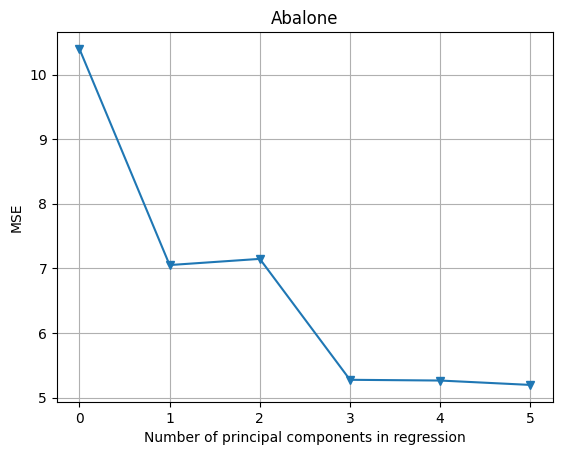

In [ ]:
plt.plot(x_axis,mse,'-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Abalone')
plt.grid()
# plt.xticks(x_axis);

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
pca2 = PCA()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.5,random_state=1)
X_reduced_train = pca2.fit_transform(scale(X_train))
n, pc =  X_reduced_train.shape

kf_10 = model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
model = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(model, np.ones((n,1)),y_train.ravel(),
                                           cv=kf_10,
                                           scoring='neg_mean_squared_error').mean()

mse.append(score)

for i in np.arange(1,20):
    score = -1*model_selection.cross_val_score(model,X_reduced_train[:,:i],y_train.ravel(),
                                           cv=kf_10,
                                           scoring='neg_mean_squared_error').mean()
    mse.append(score)

x_axis = np.arange(0,len(mse))

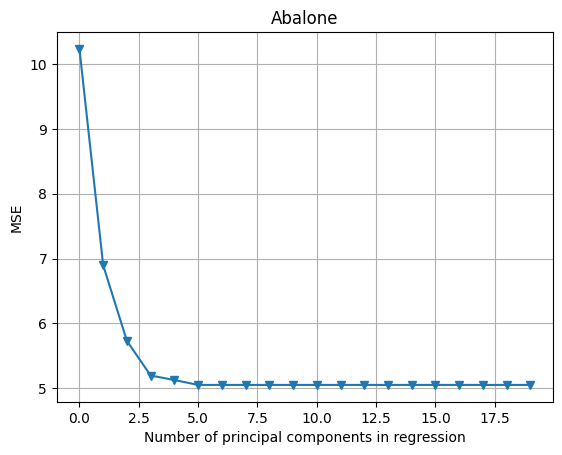

In [ ]:
plt.plot(x_axis,mse,'-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Abalone')
plt.grid()
# plt.xticks(x_axis);

In [ ]:
X_reduced_TEST = pca2.transform(scale(X_test))[:,:5]

model =sm.OLS(y_train, sm.add_constant(X_reduced_train[:,:5]))
fit_model = model.fit()

pred = fit_model.predict(sm.add_constant(X_reduced_TEST))
mse = mean_squared_error(y_test,pred)

print('Mean squared error: {}'.format(np.round(mse,2)))
print(fit_model.summary())

Mean squared error: 5.27
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          7.70e-319
Time:                        00:29:41   Log-Likelihood:                -4646.4
No. Observations:                2088   AIC:                             9305.
Df Residuals:                    2082   BIC:                             9339.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8793      

# ¿Mejoro el valor de R^2 y MSE del modelo PCR respecto al metodo de VIF?¿A que se lo adjudica?

Al comparar ambos modelos, podemos concluir que el método de PCR no muestra una mejora con respecto al enfoque de VIF. Por el contrario, el modelo PCR, a pesar de tener un valor de R^2 similar, presenta un ligero empeoramiento en el valor del error cuadrático medio. Esta situación puede atribuirse al hecho de que el modelo PCR mantiene características que no son esenciales, y al evaluar el error cuadrático medio, estas características destacan al no ajustarse de manera óptima al modelo.